# **Diwali Sales**
## **Data Analytics Project In Python**
### This project is an adaptation of an online Youtube tutorial by Rishabh Mishra. I would like to thank him for such an easy to follow and insightful tutorial which helped me improve my skills in Pandas. "All credit goes to the creator of this tutorial."

In [37]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [38]:
# Import .csv file into google colab

from google.colab import files
upload = files.upload()

Saving DiwaliSalesData.csv to DiwaliSalesData (1).csv


In [39]:
# Reading the csv file

df = pd.read_csv('DiwaliSalesData.csv', encoding='ISO-8859-1')

In [40]:
df.head(5)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [41]:
df.shape

(11251, 15)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [43]:
# Drop unnecessary columns

df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [44]:
df.head(5)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [45]:
# Checking for null values

pd.isnull(df).sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [46]:
# Drop null values

df.dropna(inplace=True)

In [47]:
# Recheck data to see if there are any more null values

pd.isnull(df).sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [48]:
# Change data type for the Amount column to int

df['Amount'] = df['Amount'].astype('int')
df['Amount'].dtypes

dtype('int64')

In [49]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [50]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [51]:
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# **Exploratory Data Analysis**

In [52]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

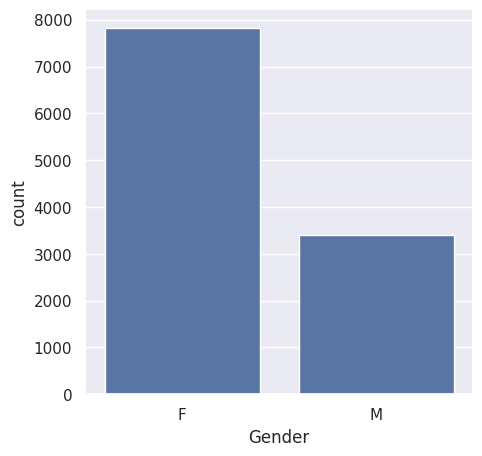

In [53]:
# Checking which gender is ordering the most frequently

ax = sns.countplot(x = 'Gender', data = df)

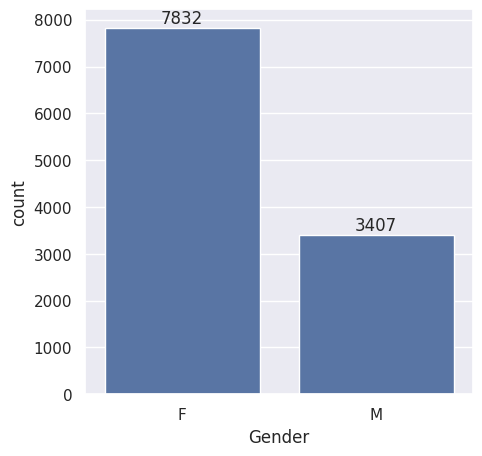

In [54]:
# Checking which gender is ordering the most frequently, the same as above but with labels included

ax = sns.countplot(x = 'Gender', data = df)

for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

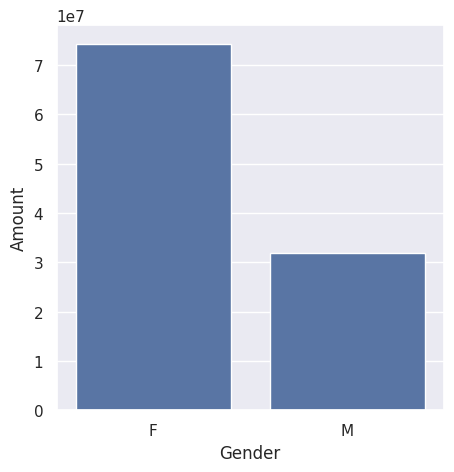

In [55]:
# Looking at which gender is spending the most

sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Gender', y = 'Amount', data = sales_gen)

### **Age**

In [56]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

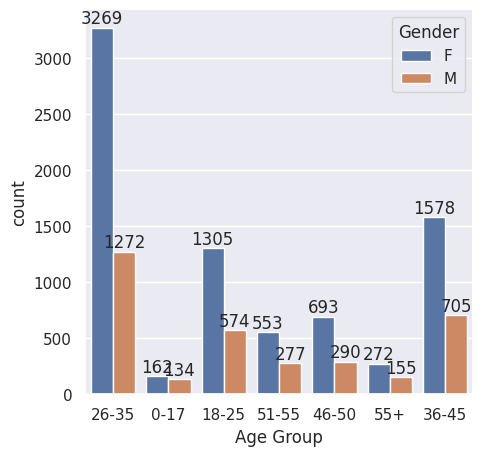

In [57]:
# Breaking down the Age Group - Gender wise

ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

for bars in ax.containers:
  ax.bar_label(bars)

In [58]:
# Checking the count of customers broken down Gender-wise

gender_count = df['Gender'].value_counts()
print(gender_count)

Gender
F    7832
M    3407
Name: count, dtype: int64


<Axes: xlabel='Age Group', ylabel='Amount'>

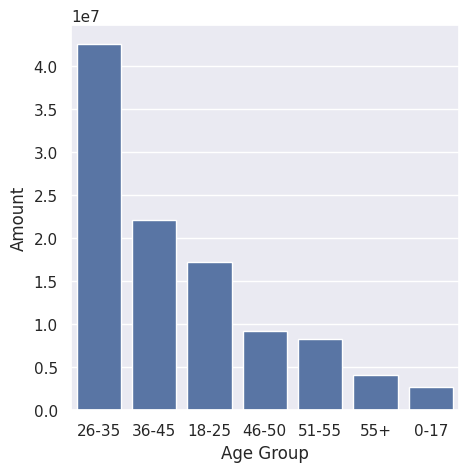

In [59]:
# Total amount spent by age groups

sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by = 'Amount', ascending=False)

sns.barplot(x = 'Age Group', y = 'Amount', data = sales_age)

### **State**

<Axes: xlabel='State', ylabel='Orders'>

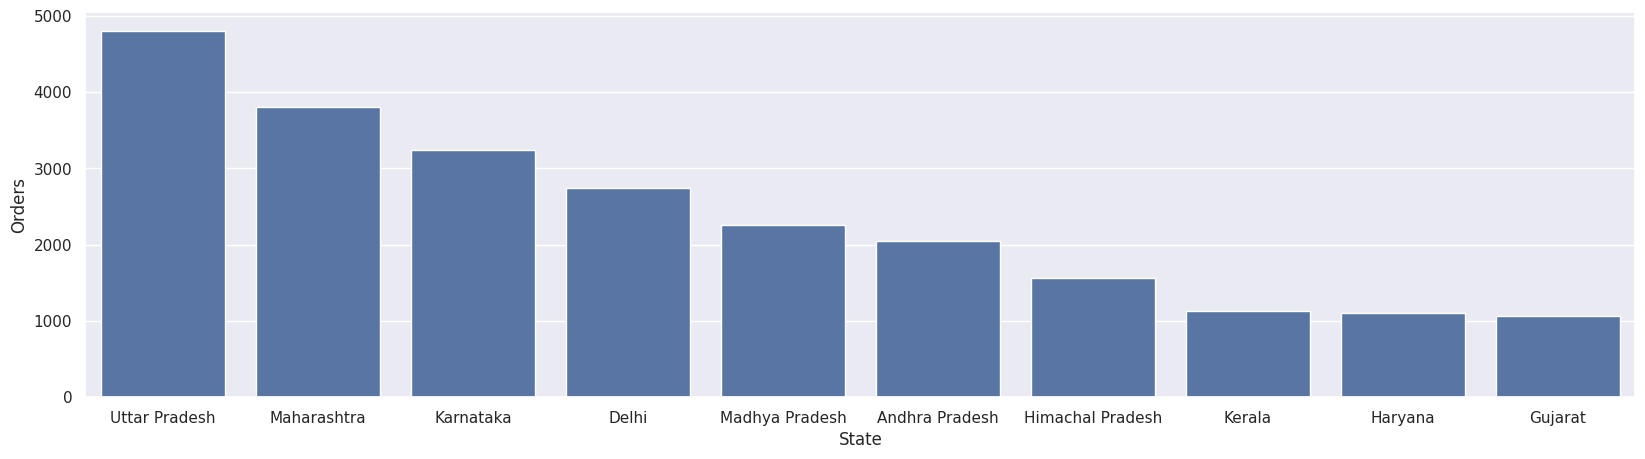

In [60]:
# Checking the number of orders according to each state

sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'State', y = 'Orders')

<Axes: xlabel='State', ylabel='Amount'>

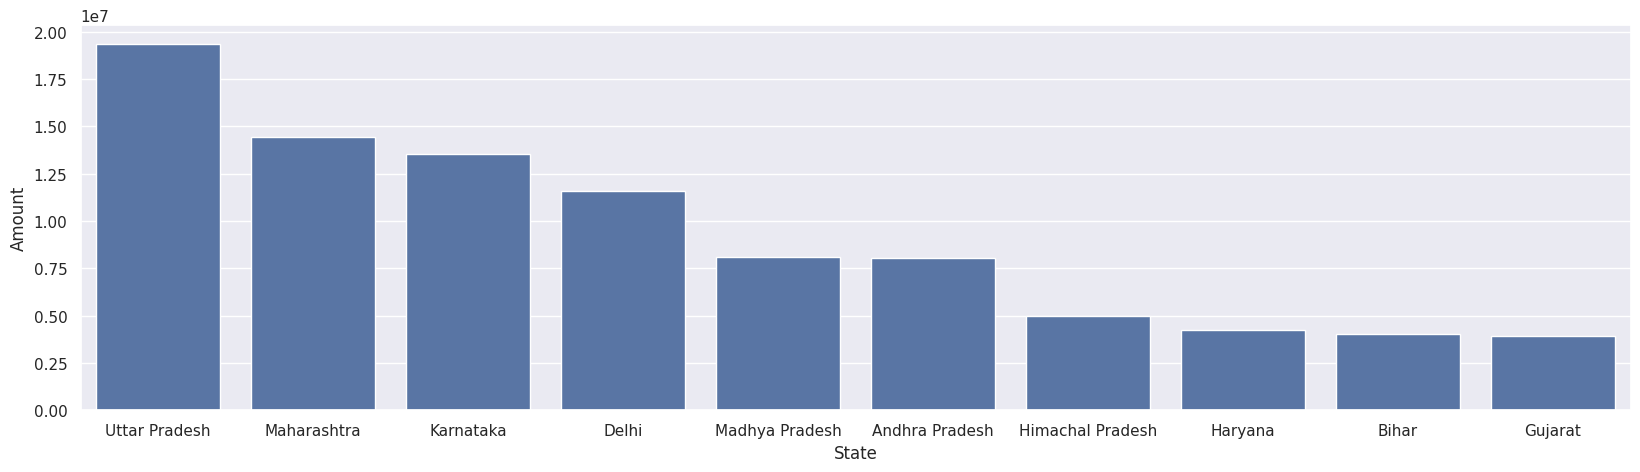

In [61]:
# Checking the total amount according to each state

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'State', y = 'Amount')

### **Marital Status**

In [62]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [63]:
# Replacing the 0 and 1 in the Marital Status column for more clarity

df['Marital_Status'] = df['Marital_Status'].replace({0: 'Married', 1: 'Not_Married'})

<Axes: xlabel='Marital_Status', ylabel='Orders'>

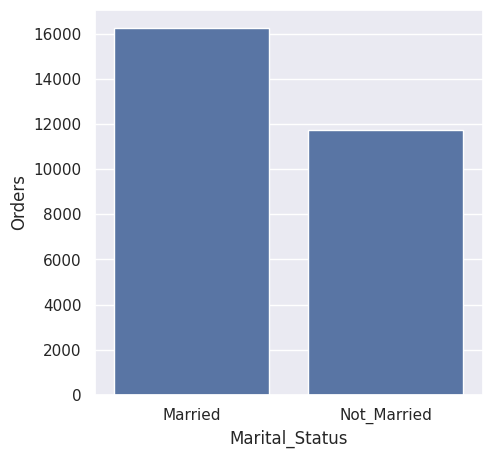

In [64]:
# Checking the number of orders according to marital status

sales_state = df.groupby(['Marital_Status'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(data = sales_state, x = 'Marital_Status', y = 'Orders')

<Axes: xlabel='Marital_Status', ylabel='Amount'>

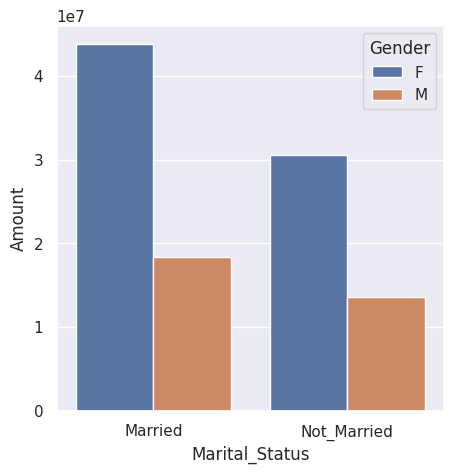

In [65]:
# Checking the total amount spent according to marital status

sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(data = sales_state, x = 'Marital_Status', y = 'Amount', hue = 'Gender')

### **Occupation**

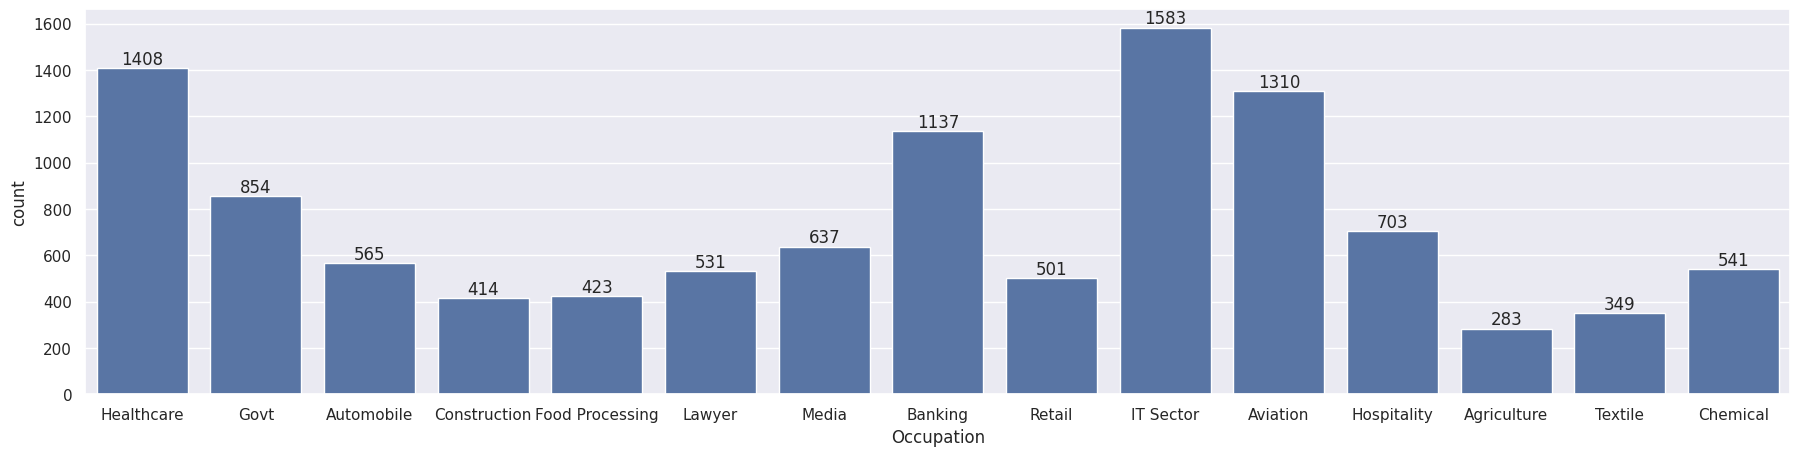

In [67]:
# Gauging which occupation is ordering the most frequently

sns.set(rc={'figure.figsize': (22,5)})
ax = sns.countplot(data = df, x = 'Occupation')

for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

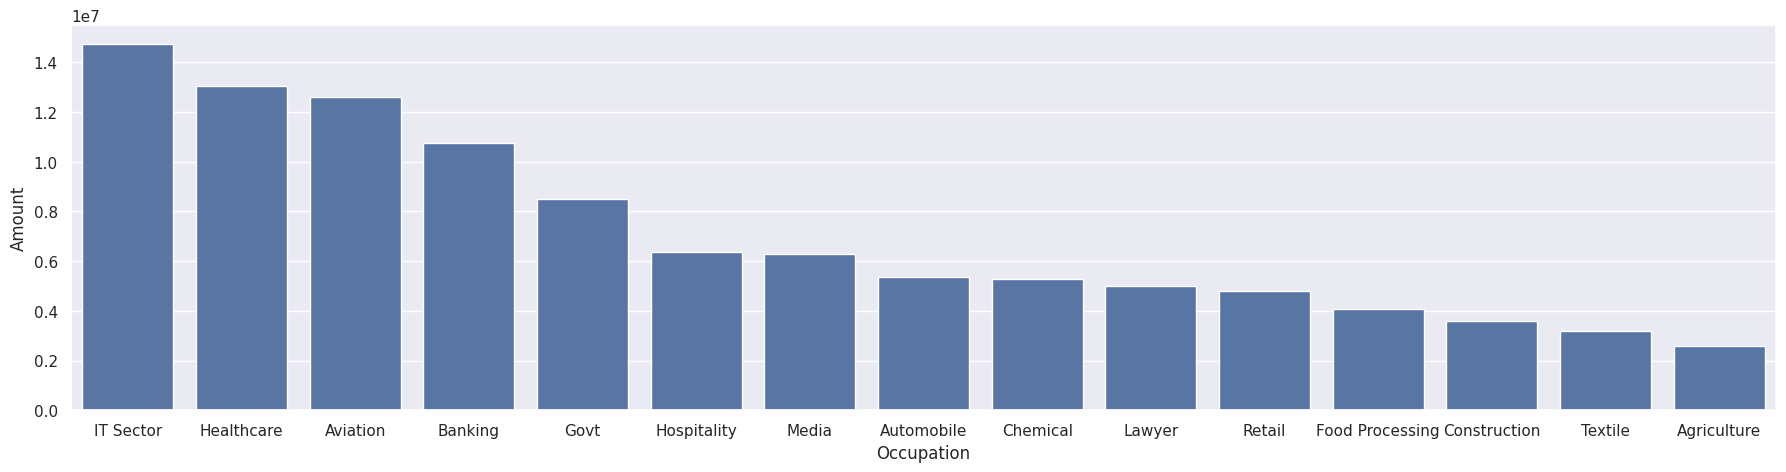

In [69]:
# Checking the amount spent by each occupation

sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by = 'Amount', ascending=False)

sns.set(rc={'figure.figsize': (22,5)})
sns.barplot(data = sales_state, x = 'Occupation', y = 'Amount')

### **Product Category**

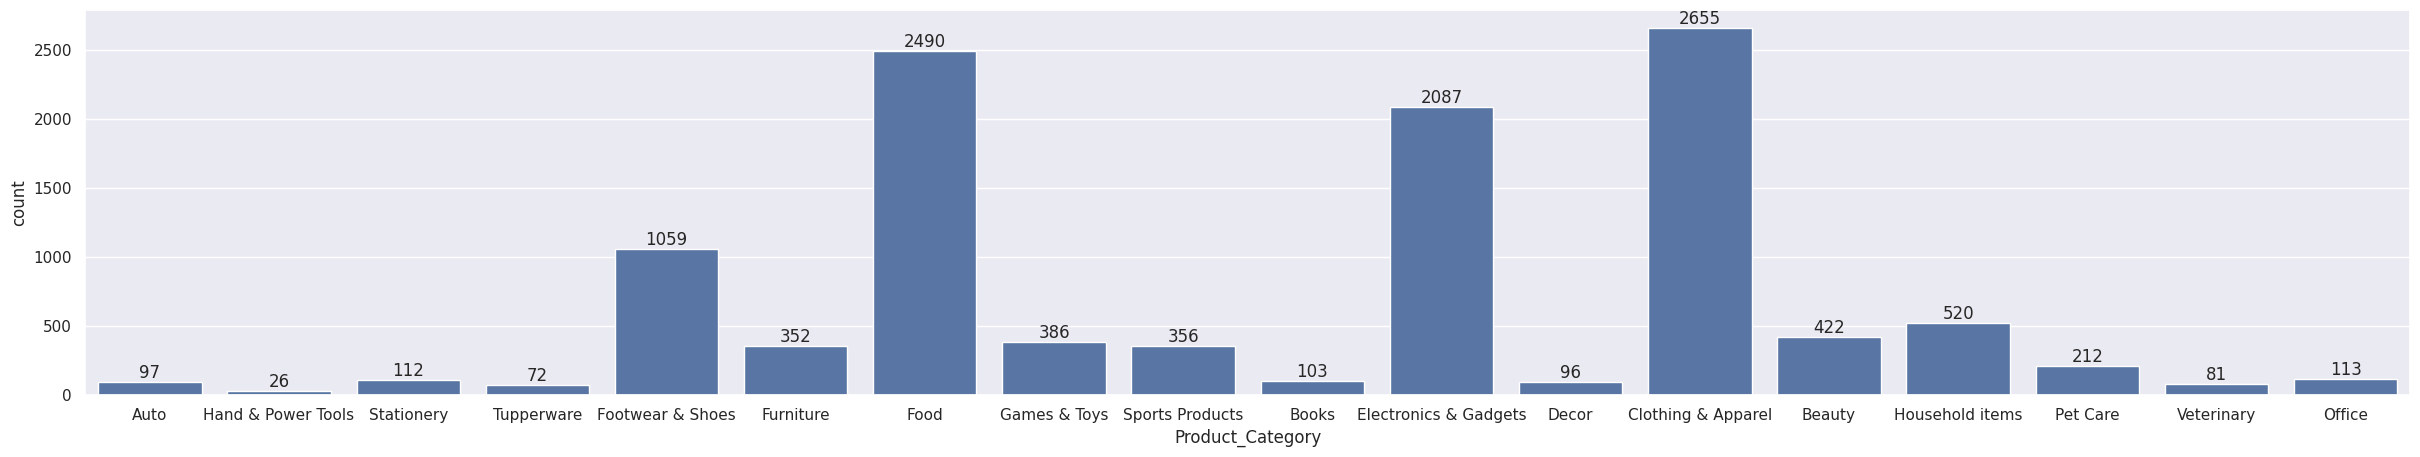

In [72]:
# Looking at the Product Category to see which one has been ordered most frequently

sns.set(rc={'figure.figsize': (30,5)})
ax = sns.countplot(data = df, x = 'Product_Category')

for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

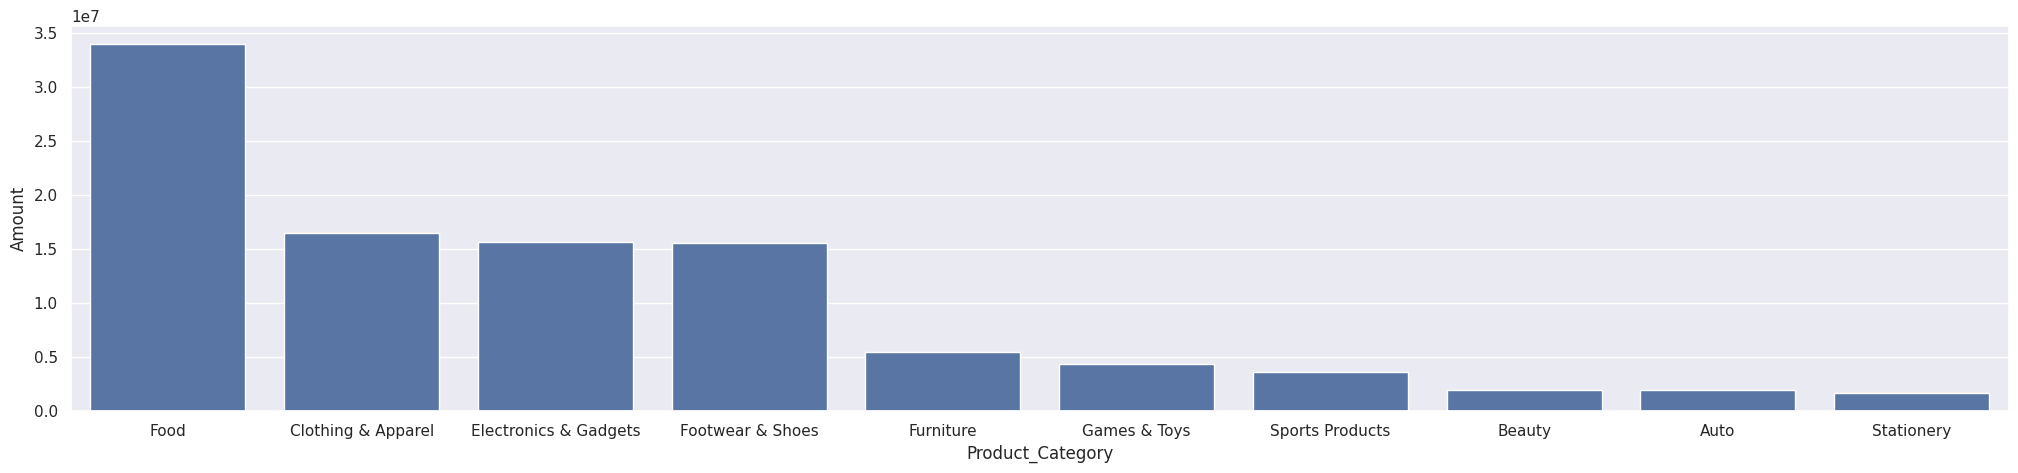

In [76]:
# Finding out how much money was spent on each product category

sales_state = df.groupby(['Product_Category'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)

sns.set(rc={'figure.figsize': (25,5)})
sns.barplot(data = sales_state, x = 'Product_Category', y = 'Amount')

In [78]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='Product_ID', ylabel='Orders'>

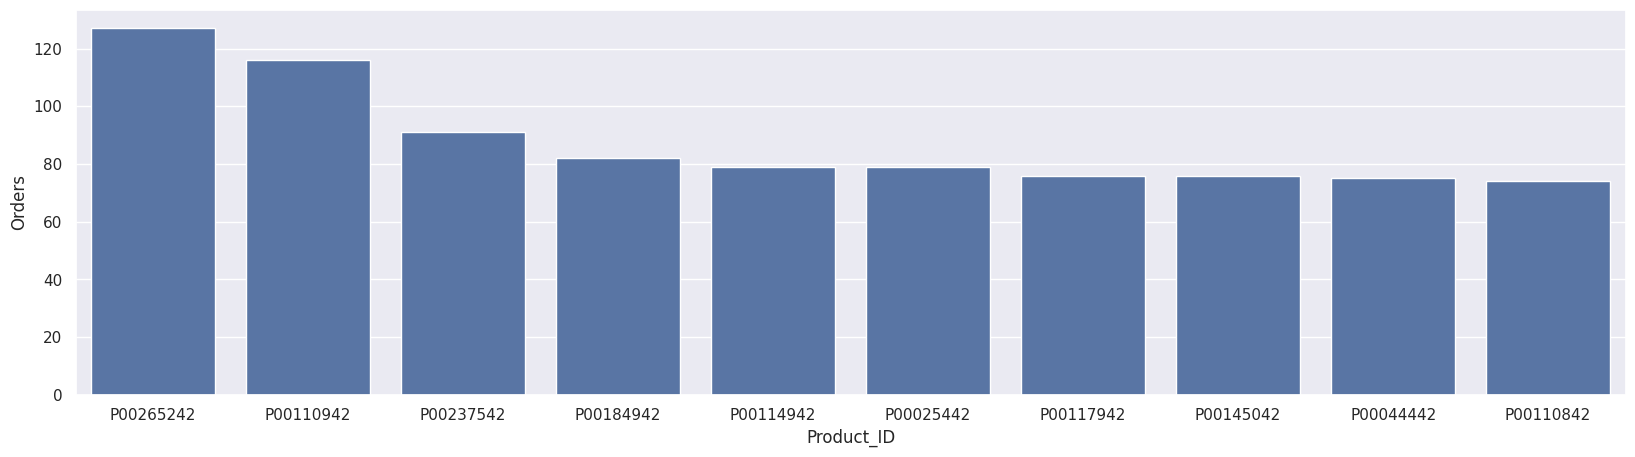

In [79]:
# Checking which products according to their ID were ordered the most

sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by = 'Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize': (20,5)})
sns.barplot(data = sales_state, x = 'Product_ID', y = 'Orders')

<Axes: xlabel='Product_ID'>

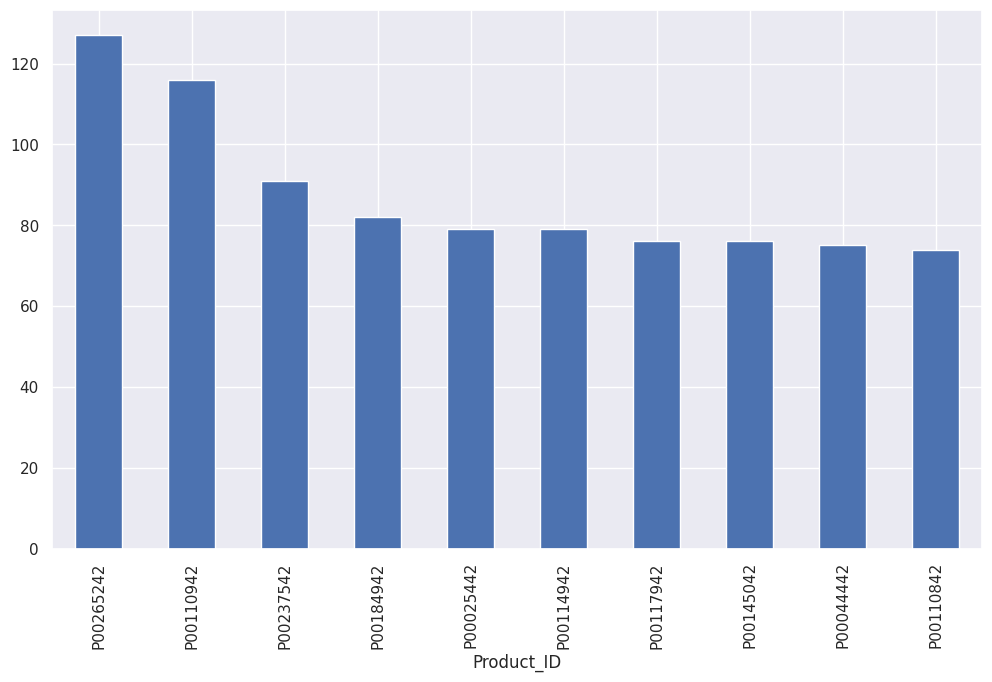

In [80]:
# Top 10 most sold products (The same thing as above, just trying a shorter code)

fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')